# Лабораторная работа №6
# Решение интегральных уравнений Вольтера

Необходимо решить интегральное уравнение Вольтера <br>
$x(t) = 4\int^t_0\left(s-t\right)x(s)ds + 3sin(t)$ <br>
квадратурным методом, пользуясь: <br>
$\bullet$методом сведения его к ОДУ (с последующим решением полученного ОДУ
аналитически или численно)  <br>
$\bullet$методом Симпсона 

Построить графики зависимостей $x(t), t\in[0,5], \tau = 0.25$, полученные разными методами. Для
восстановления решения в промежуточных точках по найденному в $(ii)$ каркасу решения
воспользоваться интерполяцией. 

#### Используемые библиотеки

In [178]:
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np
import math
import scipy

### Аналитическое решение

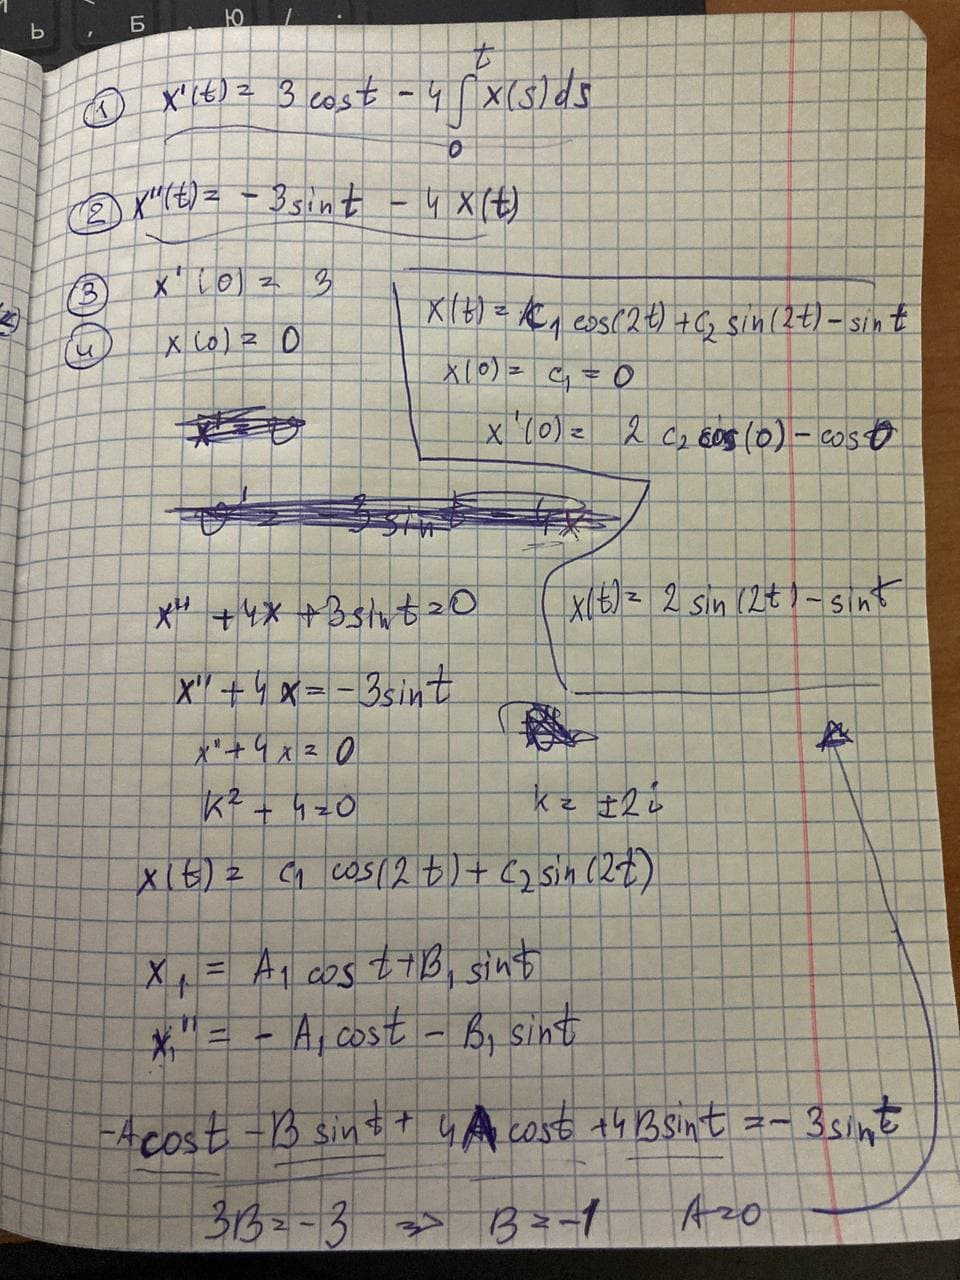

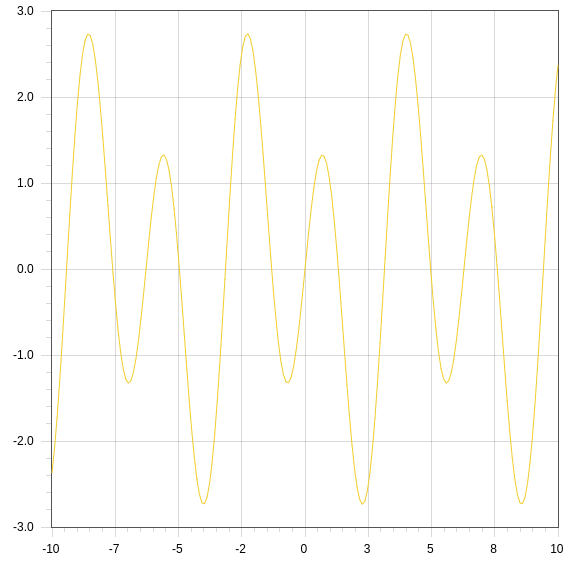

In [185]:
h = 0.25
a = 0
b = 5


def f(t: float) -> float:
    return 3 * math.sin(t)


def K(t: float, s: float) -> float:
    return 4 * (s - t)


def func_solve():
    amount = int((b - a) / h) + 1
    t = np.linspace(a, b, amount)
    size = len(t)
    arr = [f(i) for i in t]
    y = arr
    
    for i in range(size):
        y[i] = 0
        for j in range(2, i ,2):
            y[i] += 4 * K(t[i], t[j]) * arr[j]
        for j in range(1, i, 2):
            y[i] += 2 * K(t[i], t[j]) * arr[j]
        y[i] = f(t[i]) + (y[i] - K(t[i], t[1]) * arr[1] - K(t[i], t[i]) * arr[i]) * h / 3
    return y, t

In [186]:
def draw(t: list, y: list):
    fig = plt.figure()
    plt.title('Volter solution')
    plt.ylabel('x(t)')
    plt.xlabel('t')
    l1 = plt.plot(t, y)
    fig.legend((l1), ('x'))
    plt.grid(True)
    plt.show()

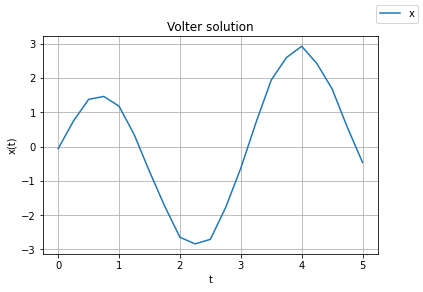

In [187]:
y, t = func_solve()
draw(t, y)